In [2]:
import numpy as np
import matplotlib.pyplot as plt

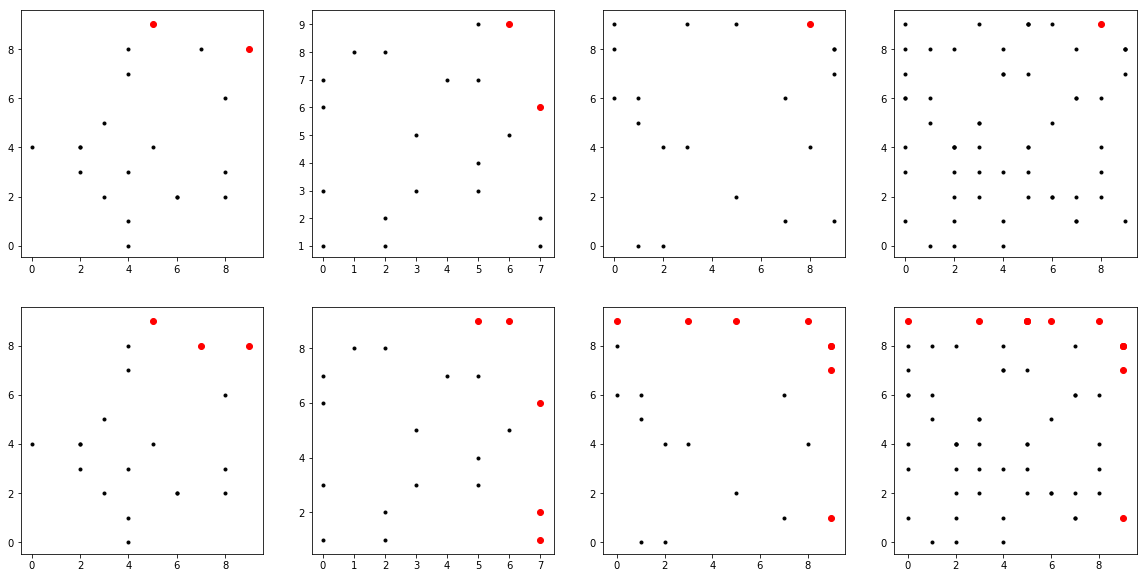

In [107]:
def slater(pts, orders=None):
    if orders is None:
        orders = [-1, -1]
    orders = np.reshape(orders, (1, 1, pts.shape[1]))
    signs = np.sign(pts.reshape(1, -1, 2) - pts.reshape(-1, 1, 2)) * orders
    signs = np.all(signs < 0, axis=2)
    idx = np.where(signs.sum(axis=1) == 0)
    return pts[idx]

def pareto(pts, orders=None):
    if orders is None:
        orders = [-1, -1]
    orders = np.reshape(orders, (1, 1, pts.shape[1]))
    signs = np.sign(pts.reshape(1, -1, 2) - pts.reshape(-1, 1, 2)) * orders
    signs = np.all(signs <= 0, axis=2)
    signs = signs * (1 - np.eye(pts.shape[0]))
    idx = np.where(signs.sum(axis=1) == 0)
    return pts[idx]

def show_slater(pts, ax, orders=None):
    frontier = slater(pts, orders=orders)
    ax.scatter(pts[:, 0], pts[:, 1], c='black', marker='.')
    ax.scatter(frontier[:, 0], frontier[:, 1], c='red', marker='o')
    
def show_pareto(pts, ax, orders=None):
    frontier = pareto(pts, orders=orders)
    ax.scatter(pts[:, 0], pts[:, 1], c='black', marker='.')
    ax.scatter(frontier[:, 0], frontier[:, 1], c='red', marker='o')

data = '47 24 82 35 32 04 54 43 98 86 40 78 59 62 62 83 41 48 23 24\n72 22 54 35 21 57 65 47 71 76 69 18 01 03 53 33 07 59 28 06\n97 20 84 08 34 98 91 76 98 15 52 71 89 59 06 10 16 24 09 39'

data = np.array([[[int(n) // 10, int(n) % 10] for n in e.split(' ')] for e in data.split('\n')])

P1 = data[0]
P2 = data[1]
P3 = data[2]
P4 = data.reshape(-1, 2)

orders = [-1, -1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))

for ax, pts in zip(axes[0], [P1, P2, P3, P4]):
    show_pareto(pts, ax, orders=orders)
    
for ax, pts in zip(axes[1], [P1, P2, P3, P4]):
    show_slater(pts, ax, orders=orders)